In [45]:
import numpy as np
import os
from tqdm import tqdm
import enzope
from matplotlib import pyplot as plt

#### En este notebook voy a explorar tecnicas para medir el r_crit y r_opt de un sistema.

In [99]:
def plot_survival(r, w, r2=None, w2=None):
    plt.scatter(r, w, alpha=.3, c='g', label=r'$r_{max}$=1', s=5)
    plt.scatter(r2, w2, c='r', alpha=.3, label=r'$r_{max}$=.5', s=5)
    plt.xticks(np.linspace(0, 1, 11))
    plt.xlim(0, 1)
    plt.yscale('log')
    plt.xlabel('r')
    plt.ylabel(r'$w_f$')
    plt.legend()
    plt.grid(which='both')

#### Corrida para f=1. Miro el scatter plot de riqueza final en funcion de riesgo, para r en todo el rango y $r_{max}$ = .5 (el $r_{crit}$ teorico es $\sim$ .37)

In [94]:
models = [enzope.CPUModel(n_agents=1000, f=.1) for _ in range(2)]
models_rm = [enzope.CPUModel(n_agents=1000, f=.1, r_max=.5) for _ in range(2)]
for model, model_rm in tqdm(zip(models, models_rm)):
    model.MCS(60000)
    model_rm.MCS(20000)

0it [01:00, ?it/s]


KeyboardInterrupt: 

In [ ]:
risks = [model.r for model in models]
wealths = [model.w for model in models]
# flatten risks
risks = [r for sublist in risks for r in sublist]
# flatten wealths
wealths = [w for sublist in wealths for w in sublist]

risks_rm = [model.r for model in models_rm]
wealths_rm = [model.w for model in models_rm]

risks_rm = [r for sublist in risks_rm for r in sublist]
wealths_rm = [w for sublist in wealths_rm for w in sublist]

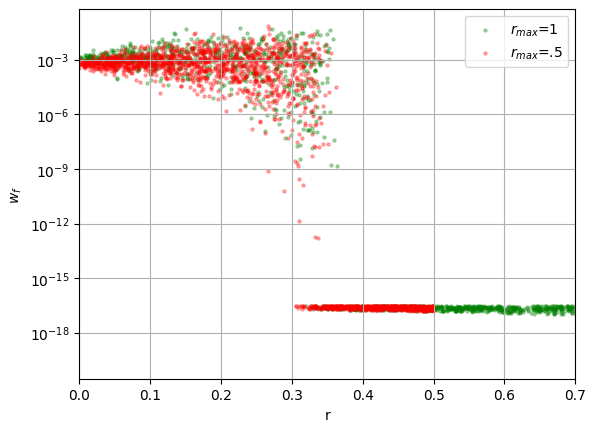

In [93]:
plot_survival(risks, wealths, risks_rm, wealths_rm)

#### Corrida para f=.2, $r_{crit}$ $\sim$ .65

In [96]:
models2 = [enzope.CPUModel(n_agents=1000, f=.2) for _ in range(2)]
models2_rm = [enzope.CPUModel(n_agents=1000, f=.2, r_max=.8) for _ in range(2)]
for model2, model2_rm in tqdm(zip(models2, models2_rm)):
    model2.MCS(60000)
    model2_rm.MCS(60000)

1it [22:03, 1323.56s/it]

In [97]:
risks2 = [model2.r for model2 in models2]
wealths2 = [model2.w for model2 in models2]
# flatten risks
risks2 = [r for sublist in risks2 for r in sublist]
# flatten wealths
wealths2 = [w for sublist in wealths2 for w in sublist]

risks2_rm = [model2.r for model2 in models2_rm]
wealths2_rm = [model2.w for model2 in models2_rm]

risks2_rm = [r for sublist in risks2_rm for r in sublist]
wealths2_rm = [w for sublist in wealths2_rm for w in sublist]

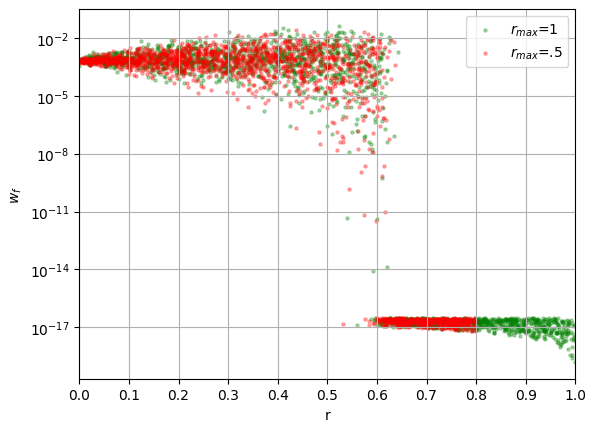

In [100]:
plot_survival(risks2, wealths2, risks2_rm, wealths2_rm)